<a href="https://colab.research.google.com/github/RedBatProject/Works/blob/main/work_51_fke_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!pip install transformers

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from itertools import chain
import tensorflow as tf
# from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
# from transformers import XLNetTokenizer, TFXLNetModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
%matplotlib inline

In [3]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

# Load Data

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"willyvonka","key":"2e9df042075e2ca80586e55c66c656a0"}'}

In [5]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d pontes/fake-news-sample

100% 498M/500M [00:28<00:00, 18.9MB/s]
100% 500M/500M [00:28<00:00, 18.7MB/s]


In [7]:
!unzip /content/fake-news-sample.zip

Archive:  /content/fake-news-sample.zip
  inflating: resized_v2.csv          


# Read Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
worknum = 51
path0 = f'/content/drive/MyDrive/work {worknum}/'
path = f'/content/drive/MyDrive/work {worknum}/results/'
#
try:
    os.mkdir(path0)
    print(path0,'done')
except:
    print(path0,'was there')
try:
    os.mkdir(path)
    print(path,'done')
except:
    print(path,'was there')

/content/drive/MyDrive/work 51/ was there
/content/drive/MyDrive/work 51/results/ was there


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# !mv /content/resized_v2.csv '/content/drive/MyDrive/work 51/data.csv'

In [8]:
df=pd.read_csv("/content/drive/MyDrive/work 51/data.csv")
df

<ipython-input-8-a3b27812d07c>:1: DtypeWarning:

Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,21,bipartisanreport.com,clickbait,http://bipartisanreport.com/cdn-cgi/l/email-pr...,The website from which you got to this page is...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Email Protection,NaN,NaN,[''],NaN,NaN,NaN,NaN
1,1,22,theshovel.com.au,satire,http://www.theshovel.com.au/tag/malcolm-turnbu...,"For as long as he can remember, Malcolm Turnbu...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,malcolm turnbull satire – The Shovel,The Shovel,NaN,[''],NaN,"3, 2",NaN,NaN
2,2,54,blackagendareport.com,unreliable,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford...",NaN,[''],“The capitalist agenda is to neo-colonize Zimb...,NaN,NaN,NaN
3,3,61,barenakedislam.com,hate,http://barenakedislam.com/2018/01/08/wow-irani...,We appreciate your help! Click here to donate\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,WOW! Iranian-Canadian protesters love Donald T...,"Cleavis Nowell, Don Spilman, Rick Oneil, Linda...",NaN,[''],NaN,NaN,NaN,NaN
4,4,64,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/afri...,“The massacre of the mine workers in August of...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Ann Garrison, Bar Contributor, Boniface Musavu...",NaN,[''],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426545,426545,9878188,nytimes.com,reliable,https://www.nytimes.com/2018/02/07/watching/k-...,Watching is The New York Times’s TV and film r...,2018-02-11 00:49:52.014593,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,A Starter Guide to Streaming Great South Korea...,Dakota Kim,NaN,[''],"Entering the unpredictable world of K-drama, y...",NaN,NaN,nytimes
426546,426546,9878196,nytimes.com,reliable,https://www.nytimes.com/2018/02/07/travel/phil...,"WHERE TO GO NOW In Philadelphia, the Ultimate ...",2018-02-11 00:49:52.027587,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"In Philadelphia, the Ultimate Eagles Celebrati...",John L. Dorman,NaN,[''],For fans headed to Philadelphia to savor the E...,op-ed columnists,NaN,nytimes
426547,426547,9878220,nytimes.com,reliable,https://www.nytimes.com/2018/02/07/us/nazi-con...,“The Illinois Republican Party and our country...,2018-02-11 00:49:52.039359,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"He’s a Nazi, Republicans Warn, but He’s Their ...",Liam Stack,NaN,"['Jones Arthur J', 'Fringe Groups and Movemen...",“There’s no way in the world they can knock me...,NaN,NaN,nytimes
426548,426548,9878237,nytimes.com,reliable,https://www.nytimes.com/2018/02/07/realestate/...,Most prominent is the lighthouse. The 90-foot-...,2018-02-11 00:49:52.059956,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"Lighthouse Hill, Staten Island: Small and Semi...","Julie Lasky, Living In",NaN,"['Real Estate and Housing (Residential)', 'Sta...",A neighborhood filled with wildlife and cultur...,NaN,NaN,nytimes


In [9]:


# !pip install vaderSentiment
# !pip install twython



In [10]:
import re

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source'],
      dtype='object')

In [12]:
df = df[['content','type']]

In [13]:
df.columns = ['text','sentiment']

In [14]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(426550, 2)


<ipython-input-14-8c1aab196c2a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(406400, 2)

In [15]:
df = df.sample(frac=0.1)

In [16]:
df = df.sample(frac=0.3)


In [17]:
def clean(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub("'", "", text)

    return text



df['text'] = df['text'].apply(lambda x:clean(x))

In [18]:
df.shape

(12192, 2)

In [19]:
df.head()

,text,sentiment
81994,new york (reuters) – a federal judge has ruled...,political
411406,the less-known tuscan coast remains full of se...,reliable
302163,what phil mickelson just announced proves that...,bias
136800,as a growing number of electoral college voter...,bias
229624,president obama’s former campaign manager on s...,bias


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12192 entries, 81994 to 255631
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       12192 non-null  object
 1   sentiment  12192 non-null  object
dtypes: object(2)
memory usage: 285.8+ KB


In [21]:
# df = df[['text','sentiment']]

In [22]:
# df.isnull().sum()

### You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

In [23]:
# df.columns

In [24]:
df.sentiment.value_counts()

reliable      2941
political     2393
bias          1719
fake          1279
conspiracy    1263
rumor          735
unknown        568
unreliable     457
clickbait      364
junksci        194
satire         169
hate           110
Name: sentiment, dtype: int64

In [25]:
df['label'],l1 = df['sentiment'].factorize()

In [26]:
df

,text,sentiment,label
81994,new york (reuters) – a federal judge has ruled...,political,0
411406,the less-known tuscan coast remains full of se...,reliable,1
302163,what phil mickelson just announced proves that...,bias,2
136800,as a growing number of electoral college voter...,bias,2
229624,president obama’s former campaign manager on s...,bias,2
...,...,...,...
227687,originally posted by ideasarebulletproof peop...,conspiracy,6
372713,"hinrichsen--evelyn merrell. age , beloved wido...",reliable,1
1684,due diligence contributor profile | more stori...,fake,4
53788,by breaking: new twist: charlie hebdo police i...,conspiracy,6


In [27]:
df.to_csv('/content/drive/MyDrive/work 51/df2.csv',index=False)
df

,text,sentiment,label
81994,new york (reuters) – a federal judge has ruled...,political,0
411406,the less-known tuscan coast remains full of se...,reliable,1
302163,what phil mickelson just announced proves that...,bias,2
136800,as a growing number of electoral college voter...,bias,2
229624,president obama’s former campaign manager on s...,bias,2
...,...,...,...
227687,originally posted by ideasarebulletproof peop...,conspiracy,6
372713,"hinrichsen--evelyn merrell. age , beloved wido...",reliable,1
1684,due diligence contributor profile | more stori...,fake,4
53788,by breaking: new twist: charlie hebdo police i...,conspiracy,6


In [28]:
lab = list(l1)

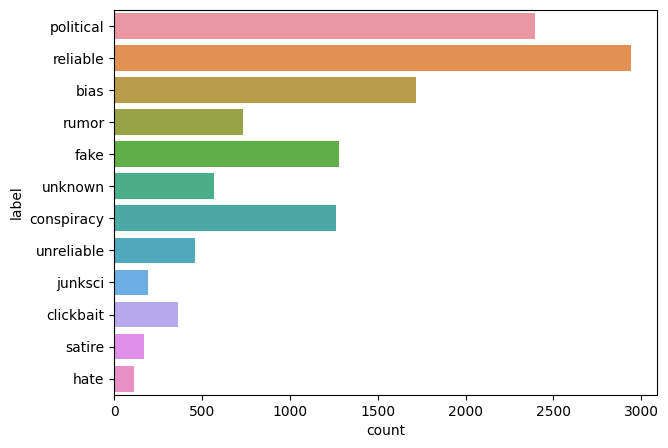

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y="label")
# plt.title("Compare Target")
df[['label','sentiment']].to_csv(f'{path}_labels.csv',index=False)
plt.yticks(range(12),lab)
plt.savefig(f'{path}_labels.png',bbox_inches='tight')
plt.show()

In [30]:
df.columns

Index(['text', 'sentiment', 'label'], dtype='object')

# Count Character

In [31]:
# df.columns = ['text','emotion','label']

In [32]:
df["character_count"]=df["text"].str.len()

# Count Word

In [33]:
df = df.copy()

In [34]:
df['word_count'] = df['text'].str.split().str.len()
df["character_count"]=df["text"].str.len()

In [35]:
df['word_count'].max()

16963

In [36]:
df['text'].iloc[0]

'new york (reuters) – a federal judge has ruled that an inmate does not have a constitutionally protected right to matzoh and grape juice. christopher henry, who was convicted of first-degree sodomy, claimed “permanent trauma” and malnourishment and requested nearly $$ billion in damages for what he called a violation of his first amendment right to religious freedom. oddly enough, henry didn’t request matzoh for passover, the jewish holiday during which it is traditionally eaten. instead, henry claimed he had a right to have the unleavened bread served daily and grape juice every friday. but on august , u.s. southern district judge shira scheindlin held that the rikers island jail could deny henry his request in the interests of maintaining order and keeping costs reasonable. “providing individualized meals to a single inmate might well foster an impression of favoritism, which could lead to jealousy and resentment among the inmate population, which in turn could cause tension and thr

# Count Sentence

In [37]:
# cor=df[["target","character_count","word_count"]].corr()
# plt.figure(figsize=(7,5))
# sns.heatmap(cor,annot=True,cmap="jet",linewidths=7, linecolor='darkorange')
# cor.to_csv(f'{path}_cor.csv')
# plt.savefig(f'{path}_cor.png',bbox_inches='tight')
# plt.show()

# Data Length

In [38]:
df['len'] = df['text'].str.split().apply(len)

<Axes: ylabel='Density'>

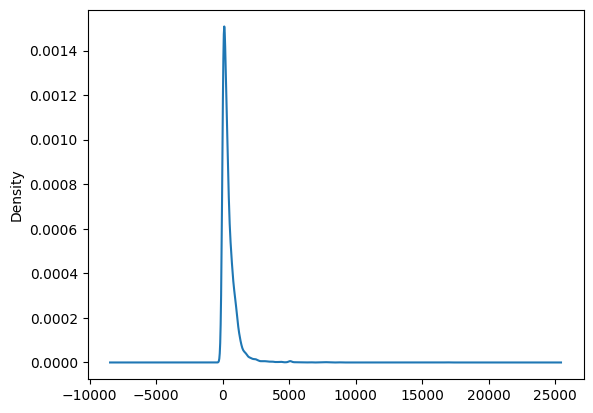

In [39]:
df.len.plot(kind='kde')

In [40]:
df = df[df['len']>=5]

In [41]:
# notdisaster_len=df[df["target"]==0]["text"].str.split().apply(len)
# disaster_len=df[df["target"]==1]["text"].str.split().apply(len)
# plt.figure(figsize=(7,5))
# plt.hist(notdisaster_len, bins=40,label='Fake',color="red")
# plt.hist(disaster_len , bins=40, label='Real',color="green")
# plt.xlim(0,2000)
# plt.title("Real Vs Fake tweet")
# plt.legend()
# notdisaster_len.to_csv(f'{path}_Fake_len.csv',index=False)
# disaster_len.to_csv(f'{path}_Real_len.csv',index=False)

# plt.savefig(f'{path}_Real-Fake_len.png',bbox_inches='tight')
# plt.show()

In [42]:
df

,text,sentiment,label,character_count,word_count,len
81994,new york (reuters) – a federal judge has ruled...,political,0,1505,233,233
411406,the less-known tuscan coast remains full of se...,reliable,1,11629,1958,1958
302163,what phil mickelson just announced proves that...,bias,2,2761,471,471
136800,as a growing number of electoral college voter...,bias,2,1546,247,247
229624,president obama’s former campaign manager on s...,bias,2,886,150,150
...,...,...,...,...,...,...
227687,originally posted by ideasarebulletproof peop...,conspiracy,6,1746,314,314
372713,"hinrichsen--evelyn merrell. age , beloved wido...",reliable,1,433,69,69
1684,due diligence contributor profile | more stori...,fake,4,951,133,133
53788,by breaking: new twist: charlie hebdo police i...,conspiracy,6,15650,2528,2528


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# df=pd.read_csv("/content/drive/MyDrive/work 46/data.csv")
# df

# ALL Data Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# all_text=" ".join(df['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(all_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_all_data.png',bbox_inches='tight')
# plt.show()

# Disaster Data Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# disaster_wordcloud=df[df["target"]==1]
# disaster_text=" ".join(disaster_wordcloud['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(disaster_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_disaster_data.png',bbox_inches='tight')
# plt.show()

# Non Disaster Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# nondisaster_wordcloud=df[df["target"]==0]
# nondisaster_text=" ".join(nondisaster_wordcloud['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(nondisaster_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_non_disaster_data.png',bbox_inches='tight')
# plt.show()

# 30 Most common Words From All Text

In [ ]:
# data_set =df["text"].str.split()
# all_words = list(chain.from_iterable(data_set))
# counter = Counter(all_words)
# common_words = counter.most_common(30)
# df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# colors = ["darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen",
#     "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
#           "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",

#           "cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen"]

# plt.figure(figsize=(12, 6))
# sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
# plt.title('30 Most Common Words')
# plt.xlabel('Count')
# plt.ylabel('Word')
# df_common_words.to_csv(f'{path}_df_common_words.csv')
# plt.savefig(f'{path}_df_common_words.png',bbox_inches='tight')
# plt.show()


# Most Common Words From Non Disaster Text

In [ ]:
df

,text,emotion,label,character_count,word_count,len
0,Same folks said daikon paste could treat a cyt...,Positive,0,74,11,11
1,While the world has been on the wrong side of ...,Negative,1,117,20,20
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Positive,0,107,14,14
3,"Facts are immutable, Senator, even when you're...",Neutral,2,116,19,19
4,Explain to me again why we need a vaccine @Bor...,Neutral,2,112,13,13
...,...,...,...,...,...,...
11014,@ruvanw @GMalavige @ I already had my for #Pf...,Neutral,2,89,15,15
11015,"The number of Covid- cases today, November . ...",Positive,0,109,17,17
11017,"The number of Covid- cases today, November . ...",Positive,0,109,17,17
11018,#PfizerBioNTech has developed new pill #Paxlov...,Positive,0,110,17,17


In [ ]:
import re

In [ ]:
def removepunc(x):
    x = x.lower()
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    return x

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
  x = ' '.join([word for word in x.split() if word not in stop_words])

  return x

In [ ]:
df['text2'] = df['text'].apply(lambda x:removepunc(x))

In [ ]:
df['text2'] = df['text2'].apply(lambda x:lenword(x))

In [ ]:
df['text2']

0        folks said daikon paste could treat cytokine s...
1        world wrong side history year hopefully bigges...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
3        facts immutable senator even youre ethically s...
4        explain need vaccine whereareallthesickpeople ...
                               ...                        
11014          already pfizerbiontech last month dubai uae
11015    number covid cases today november remember obs...
11017    number covid cases today november remember obs...
11018    pfizerbiontech developed new pill paxlovid inc...
11019    number covid cases today november remember obs...
Name: text2, Length: 10817, dtype: object

In [ ]:
df

,text,emotion,label,character_count,word_count,len,text2
0,Same folks said daikon paste could treat a cyt...,Positive,0,74,11,11,folks said daikon paste could treat cytokine s...
1,While the world has been on the wrong side of ...,Negative,1,117,20,20,world wrong side history year hopefully bigges...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Positive,0,107,14,14,coronavirus sputnikv astrazeneca pfizerbiontec...
3,"Facts are immutable, Senator, even when you're...",Neutral,2,116,19,19,facts immutable senator even youre ethically s...
4,Explain to me again why we need a vaccine @Bor...,Neutral,2,112,13,13,explain need vaccine whereareallthesickpeople ...
...,...,...,...,...,...,...,...
11014,@ruvanw @GMalavige @ I already had my for #Pf...,Neutral,2,89,15,15,already pfizerbiontech last month dubai uae
11015,"The number of Covid- cases today, November . ...",Positive,0,109,17,17,number covid cases today november remember obs...
11017,"The number of Covid- cases today, November . ...",Positive,0,109,17,17,number covid cases today november remember obs...
11018,#PfizerBioNTech has developed new pill #Paxlov...,Positive,0,110,17,17,pfizerbiontech developed new pill paxlovid inc...


In [ ]:
from collections import Counter

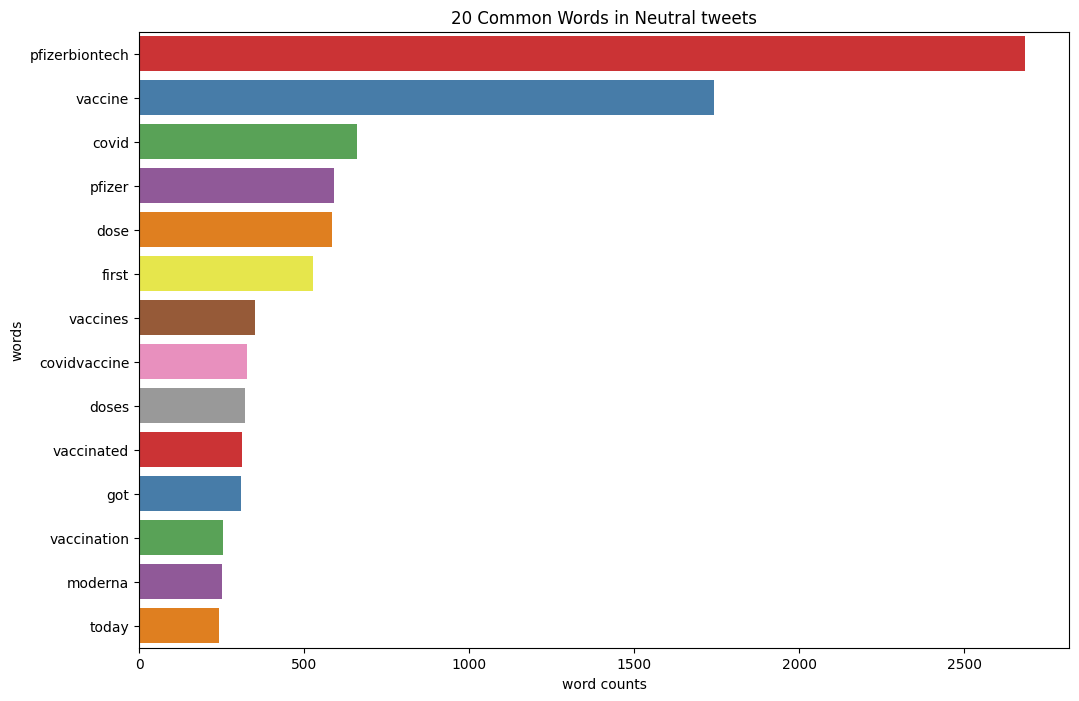

In [ ]:
no_disaster_text = df[df["label"] == 2]
data_set = no_disaster_text["text2"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(14)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('20 Common Words in Neutral tweets')
plt.xlabel('word counts')
plt.ylabel('words')
# plt.ylabel('Word')
df_common_words.to_csv(f'{path}_df_common_words_neutral.csv')
plt.savefig(f'{path}_df_common_words_neutral.png',bbox_inches='tight')
plt.show()



# 30 Most Common Words From Disaster Text

In [ ]:
# disaster_text = df[df["target"] == 1]
# data_set = disaster_text["text"].str.split()
# all_words = [word for sublist in data_set for word in sublist]
# counter = Counter(all_words)
# common_words = counter.most_common(30)
# df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
# plt.figure(figsize=(12, 8))
# colors = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "gray",
#           "cyan", "magenta", "teal", "olive", "lime", "navy", "maroon", "aquamarine",
#           "coral", "gold", "indigo", "lavender", "salmon", "silver", "tan", "violet",
#           "crimson", "darkgreen", "darkblue", "darkorange", "deeppink"]
# sns.barplot(x='Count', y='Word', data=df_common_words,palette=colors)
# plt.title('30 Most Common Words Real')
# plt.xlabel('Count  Real')
# plt.ylabel('Real Word')
# df_common_words.to_csv(f'{path}_df_common_words_Real.csv')
# plt.savefig(f'{path}_df_common_words_Real.png',bbox_inches='tight')
# plt.show()


# Character Count

In [ ]:
# color=["red","green"]
# plt.figure(figsize=(7,5))

# sns.histplot(data=df,x="character_count",palette=color,kde=True,hue="label",element="step",stat="density")
# plt.title("Character Count",fontsize=15,color="darkblue")
# df['character_count'].to_csv(f'{path}_character_count.csv')
# plt.savefig(f'{path}_character_count.png',bbox_inches='tight')
# plt.show()

# Word Count

In [ ]:
# color=["navy","darkorange"]
# plt.figure(figsize=(7,5))

# sns.histplot(data=df,x="word_count",palette=color,kde=True,hue="label")
# plt.title("Word Count",fontsize=15,color="darkblue")
# plt.xlim(0,2000)
# df[['word_count','label']].to_csv(f'{path}_word_count.csv')
# plt.savefig(f'{path}_word_count.png',bbox_inches='tight')
# plt.show()

# Sentence Count

In [ ]:
df.columns

Index(['text', 'emotion', 'label', 'character_count', 'word_count', 'len',
       'text2'],
      dtype='object')

In [ ]:
df.drop(['character_count', 'word_count','text2'],axis=1,inplace=True)

# Average Sentence Length

In [45]:
df['len'].mean(),df['len'].max()

(467.4963090551181, 16963)

In [ ]:
df.columns

Index(['text', 'emotion', 'label', 'len'], dtype='object')

In [ ]:
avg_len=df["text"].str.split().apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 15.48


# Maximum Length

In [67]:
SEQ_LEN=100

In [68]:
text_data=df["text"]
label_data=df["label"]
label_data=np.array(label_data)

# Teransformer 2

In [69]:
# SEQ_LEN = 1250

In [70]:
tf.keras.backend.clear_session()

In [71]:
# pip install transformers

In [72]:
from transformers import AutoTokenizer
from transformers import TFAutoModel

In [73]:

# 10. GPT-Neo (Generative Pre-trained Transformer Neo):
#     - Full Name: `EleutherAI/gpt-neo-1.3B,gpt2` (or other versions with varying model sizes)

# 19. MarianMT (Multilingual Transformer-based Machine Translation):
#     - Full Name: `Helsinki-NLP/opus-mt-{src}-{tgt}` (Replace `{src}` and `{tgt}` with language codes)

In [74]:
kk = 't5-small,google/electra-base-discriminator,albert-base-v2,xlnet-base-cased,distilbert-base-uncased,roberta-base,bert-base-uncased,google/mt5-small,allenai/longformer-base-4096,facebook/bart-large,microsoft/mpnet-base,funnel-transformer/small-base,microsoft/deberta-base,google/mobilebert-uncased,xlm-roberta-base,ctrl,EleutherAI/gpt-neo-1.3B,gpt2,GPT-4/GPT-3/main,asi/albert-act-base,asi/albert-act-small,prajjwal1/bert-tiny,TheBloke/llama-2-70b-Guanaco-QLoRA-fp16,vinai/bertweet-base,nlpproject2023/small-bert,readerbench/RoBERT-small,SamLowe/roberta-base-go_emotions,roberta-base'.split(',')
len(kk)

28

In [75]:
# m = "stevhliu/my_awesome_model"
# m = 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16'
# m = 'GPT2'
# m = 'vinai/bertweet-base'
# m = 'GPT-4/GPT-3'
# m = 'tum-nlp/IDMGSP-Galactica-TRAIN_GPT3'
# m = 'asi/albert-act-small'
# m ='prajjwal1/bert-tiny'
# m = 'asi/albert-act-base'
# m = 'albert-base-v2'

In [76]:
# 0,
# 7
# 18
# 19
# 20


In [77]:
'XLNetTokenizer, AlbertTokenizer, CamembertTokenizer, MBartTokenizer, PegasusTokenizer, T5Tokenizer, ReformerTokenizer, XLMRobertaTokenizer '

'XLNetTokenizer, AlbertTokenizer, CamembertTokenizer, MBartTokenizer, PegasusTokenizer, T5Tokenizer, ReformerTokenizer, XLMRobertaTokenizer '

In [78]:
pip install transformers[sentencepiece]


In [79]:
import transformers

In [80]:
pip install sentencepiece

In [81]:
kk

['t5-small',
 'google/electra-base-discriminator',
 'albert-base-v2',
 'xlnet-base-cased',
 'distilbert-base-uncased',
 'roberta-base',
 'bert-base-uncased',
 'google/mt5-small',
 'allenai/longformer-base-4096',
 'facebook/bart-large',
 'microsoft/mpnet-base',
 'funnel-transformer/small-base',
 'microsoft/deberta-base',
 'google/mobilebert-uncased',
 'xlm-roberta-base',
 'ctrl',
 'EleutherAI/gpt-neo-1.3B',
 'gpt2',
 'GPT-4/GPT-3/main',
 'asi/albert-act-base',
 'asi/albert-act-small',
 'prajjwal1/bert-tiny',
 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16',
 'vinai/bertweet-base',
 'nlpproject2023/small-bert',
 'readerbench/RoBERT-small',
 'SamLowe/roberta-base-go_emotions',
 'roberta-base']

In [82]:
i = 2
print(kk[i])


albert-base-v2


In [83]:
tokenizer = AutoTokenizer.from_pretrained(kk[i])

# tokenizer = AutoTokenizer.from_pretrained('readerbench/RoBERT-small')


In [84]:
bert = TFAutoModel.from_pretrained(kk[i]
                                   ,from_pt=True
                                   )
# bert = TFAutoModel.from_pretrained('readerbench/RoBERT-small')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.decoder.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [85]:
# import tensorflow as tf
# from transformers import MT5Tokenizer, TFAutoModelForSequenceClassification

# # Load pre-trained MT5 model and tokenizer
# model_name = 'google/mt5-small'
# tokenizer = MT5Tokenizer.from_pretrained(model_name)
# bert = TFAutoModel.from_pretrained(kk[i])

In [86]:
# AutoTokenizer.from_pretrained

In [87]:
data = df.copy()


In [88]:
# SEQ_LEN = 22

In [89]:
# data = data.sample(frac=0.1)

In [90]:
Xids = np.zeros((len(data),SEQ_LEN))
Xmask = np.zeros((len(data),SEQ_LEN))


In [91]:
Xids.shape

(12192, 100)

In [92]:
# tokenizer.eos_token

In [93]:
tokenizer.pad_token = '<|PAD|>'

In [94]:
for i, sequence in enumerate(data['text']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [95]:
import tensorflow as tf

In [96]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [97]:
labels = data['label']

In [98]:
s = data['label'].to_numpy()

In [99]:
s.max(),s.shape[0]

(11, 12192)

In [100]:
s1 = np.zeros((s.shape[0],s.max()+1))

In [101]:
s1.shape

(12192, 12)

In [102]:
for i,j in enumerate(s):
    s1[i][j] = 1

In [103]:
labels = s1

In [104]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [105]:
# labels.sum(axis=0)

In [106]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [107]:
dataset = dataset.map(map_func)

In [108]:
dataset = dataset.shuffle(1000000).batch(32)

In [109]:
DS_LEN = len(list(dataset))

In [110]:
DS_LEN

381

In [111]:
# round(DS_LEN*SPLIT)

In [112]:
# len(train)

In [113]:
DATASET_SIZE = len(dataset)

In [114]:
train_size = int(0.65 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.25 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [115]:
train = train_dataset
test = test_dataset
val = val_dataset

In [116]:
# SPLIT = 0.8
# train = dataset.take(round(DS_LEN*SPLIT))
# val = dataset.skip(round(DS_LEN*SPLIT))
# test = dataset.skip(round())
# # del dataset

In [117]:
labels.shape

(12192, 12)

In [118]:
tf.keras.backend.clear_session()

In [119]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation = 'relu')(X)
y = tf.keras.layers.Dense(12, activation = 'softmax' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [120]:
model.layers[2].trainable = False

In [121]:
# model.load_weights(f'{path0}checkpoint')

In [122]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_albert_model (TFAlbertM  TFBaseModelOutputWithPooli   1168358   ['input_ids[0][0]',           
 odel)                       ng(last_hidden_state=(None   4          'attention_mask[0][0]']      
                             , 100, 768),                                                     

In [123]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf

In [124]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [125]:
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
# Adamax(learning_rate=0.1)

In [126]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [127]:
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy','AUC'])
# model.load_weights(f'{path}checkpoint')


In [130]:
num_epochs = 12
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/12
247/247 [==============================] - 72s 290ms/step - loss: 0.6882 - accuracy: 0.7653 - val_loss: 0.5422 - val_accuracy: 0.8045 - lr: 0.0100
Epoch 2/12
247/247 [==============================] - 73s 292ms/step - loss: 0.6665 - accuracy: 0.7783 - val_loss: 0.6327 - val_accuracy: 0.7869 - lr: 0.0100
Epoch 3/12
247/247 [==============================] - 72s 292ms/step - loss: 0.7140 - accuracy: 0.7681 - val_loss: 0.5025 - val_accuracy: 0.8277 - lr: 0.0100
Epoch 4/12
247/247 [==============================] - 72s 290ms/step - loss: 0.6569 - accuracy: 0.7834 - val_loss: 0.5531 - val_accuracy: 0.8125 - lr: 0.0100
Epoch 5/12
247/247 [==============================] - 71s 286ms/step - loss: 0.6454 - accuracy: 0.7874 - val_loss: 0.5627 - val_accuracy: 0.7941 - lr: 0.0100
Epoch 6/12
247/247 [==============================] - 78s 313ms/step - loss: 0.6657 - accuracy: 0.7863 - val_loss: 0.5216 - val_accuracy: 0.8173 - lr: 0.0100
Epoch 7/12
247/247 [==============================] 

In [135]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
num_epochs = 25
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/25
247/247 [==============================] - 72s 291ms/step - loss: 0.4224 - accuracy: 0.8482 - val_loss: 0.3490 - val_accuracy: 0.8694 - lr: 7.0000e-06
Epoch 2/25
247/247 [==============================] - 72s 290ms/step - loss: 0.4029 - accuracy: 0.8574 - val_loss: 0.3278 - val_accuracy: 0.8806 - lr: 7.0000e-06
Epoch 3/25
247/247 [==============================] - 72s 290ms/step - loss: 0.4083 - accuracy: 0.8512 - val_loss: 0.3240 - val_accuracy: 0.8790 - lr: 7.0000e-06
Epoch 4/25
247/247 [==============================] - 72s 291ms/step - loss: 0.4036 - accuracy: 0.8555 - val_loss: 0.3328 - val_accuracy: 0.8854 - lr: 7.0000e-06
Epoch 5/25
247/247 [==============================] - 71s 288ms/step - loss: 0.4138 - accuracy: 0.8531 - val_loss: 0.3193 - val_accuracy: 0.8854 - lr: 7.0000e-06
Epoch 6/25
247/247 [==============================] - 73s 292ms/step - loss: 0.4052 - accuracy: 0.8570 - val_loss: 0.3492 - val_accuracy: 0.8774 - lr: 7.0000e-06
Epoch 7/25
247/247 [========

In [ ]:
# os.mkdir(f'{path0}44/')
# path0
# path2 = f'{path0}44/'

In [133]:
model.save_weights(f'{path}checkpoint')

In [ ]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# accuracy = tf.keras.metrics.CategoricalAccuracy()
# auc = tf.keras.metrics.AUC(num_thresholds=6)
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
#   precision.update_state(s,j)
#   accuracy.update_state(s,j)
#   auc.update_state(s,j)
#   recall.update_state(s,j)
# pre = precision.result().numpy()
# rec = recall.result().numpy()
# au = auc.result().numpy()
# acc = accuracy.result().numpy()
# print(pre,rec,au,acc)

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
yp

array([[8.5664195e-01, 2.1181380e-02, 1.2217672e-01],
       [8.1542772e-01, 9.0411969e-04, 1.8366814e-01],
       [1.2406696e-02, 9.8513108e-01, 2.4621419e-03],
       ...,
       [9.5079130e-01, 2.7479252e-02, 2.1729494e-02],
       [1.5744226e-02, 7.0688319e-03, 9.7718698e-01],
       [1.3033297e-03, 9.9690092e-01, 1.7957815e-03]], dtype=float32)

In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1
# y1 = y_test
print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1161
           1       0.95      0.84      0.89       434
           2       0.91      0.93      0.92      1093

   micro avg       0.93      0.91      0.92      2688
   macro avg       0.94      0.89      0.91      2688
weighted avg       0.93      0.91      0.92      2688
 samples avg       0.93      0.91      0.91      2688



In [ ]:
yp

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
yp = yp.reshape(-1,)
yt = yt.reshape(-1,)


In [ ]:
np.sum(yt==yp)/yt.shape[0]

0.947296626984127

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
yp

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'robert-large'

ff.to_csv(f'{path0}{pa}3.csv',index=False)

In [ ]:
from sklearn.metrics import classification_report

def savemod(model,pa,y_test,X_test,path=path):
    y2 = model.predict(X_test)
    y2_ = np.array(y2)
    y2_[y2_ < 0.5] = 0
    y2_[y2_ > 0.5] = 1
    y1 = y_test
    print(classification_report(y1,y2_,target_names=target_names))
    y1 = y1.reshape(-1,) # np.zeros((y_test.shape[0],))
    y2 = y2.reshape(-1,)
    # y2 = y_   # np.zeros((y_test.shape[0],))
    # y2[y2 < 0.5] = 0
    # y2[y2 > 0.5] = 1

    # for i in range(len(y_test)):
        # y1[i] = 1 if y1> 0.5 else 0
        # y2[i] = y_test[i].argmax()
    ff = pd.DataFrame(columns=['real','predicted'],)
    ff['real'] = y2
    ff['predicted'] = y1


    ff.to_csv(f'{path}{pa}.csv',index=False)

In [ ]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=1e-6), loss='binary_crossentropy')

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
num_epochs = 50
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

# simple models

In [ ]:
data = df

In [ ]:
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 31
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
Xsequences = tokenizer.texts_to_sequences(data['text'])

In [ ]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [ ]:
data

,text,emotion,label,len
0,Same folks said daikon paste could treat a cyt...,Positive,0,11
1,While the world has been on the wrong side of ...,Negative,1,20
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Positive,0,14
3,"Facts are immutable, Senator, even when you're...",Neutral,2,19
4,Explain to me again why we need a vaccine @Bor...,Neutral,2,13
...,...,...,...,...
11014,@ruvanw @GMalavige @ I already had my for #Pf...,Neutral,2,15
11015,"The number of Covid- cases today, November . ...",Positive,0,17
11017,"The number of Covid- cases today, November . ...",Positive,0,17
11018,#PfizerBioNTech has developed new pill #Paxlov...,Positive,0,17


In [ ]:
labels = data['label']

In [ ]:
s = data['label'].to_numpy()

In [ ]:
s.max(),s.shape[0]

(2, 10817)

In [ ]:
s1 = np.zeros((s.shape[0],s.max()+1))

In [ ]:
s1.shape

(10817, 3)

In [ ]:
for i,j in enumerate(s):
    s1[i][j] = 1

In [ ]:
labels = s1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xsequences, labels))

In [ ]:
dataset = dataset.shuffle(1000000).batch(32)

In [ ]:
DS_LEN = len(list(dataset))

In [ ]:
DS_LEN

339

In [ ]:
DATASET_SIZE = len(dataset)

In [ ]:
train_size = int(0.60 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.25 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
train = train_dataset
test = test_dataset
val = val_dataset

In [ ]:
embedding_dim = 20

In [ ]:
pa = 'LSTM-CNN'

In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 31, 20)            60000     
                                                                 
 bidirectional_5 (Bidirecti  (None, 31, 64)            13568     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 31, 64)            24832     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)

In [ ]:
# Train model
num_epochs = 1
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    )

203/203 [==============================] - 17s 86ms/step - loss: 0.3573 - accuracy: 0.8841 - val_loss: 0.2997 - val_accuracy: 0.9062 - lr: 0.0010


In [ ]:
tr = []
pr = []
l = 0
for i,j in test.take(-1):
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1
# y1 = y_test
print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1152
           1       0.86      0.84      0.85       409
           2       0.84      0.98      0.90      1127

   micro avg       0.77      0.95      0.85      2688
   macro avg       0.80      0.92      0.85      2688
weighted avg       0.78      0.95      0.85      2688
 samples avg       0.83      0.95      0.87      2688



In [ ]:
# yp = np.concatenate([y for y in pr], axis=0)
# yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
path

'/content/drive/MyDrive/work 49/results/'

In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'LSTM'

ff.to_csv(f'{path}{pa}.csv',index=False)

# visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [ ]:
# path = '/content/drive/MyDrive/work 46/results/'

In [ ]:
name = 'Albert'
dg = pd.read_csv(f'//content/drive/MyDrive/work 49/results/robert-large3.csv')
yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
yp,yt

(array([1., 0., 0., ..., 0., 1., 0.]), array([1., 0., 0., ..., 0., 1., 0.]))

In [ ]:
yp = yp + abs(np.random.randn(yp.shape[0]))/20
yp = yp.reshape(-1,3)
yp = yp / np.array([yp.sum(1),yp.sum(1),yp.sum(1)]).T


1.0

In [ ]:
# name = 'Bert-base-uncased'

In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1

In [ ]:
y_test, y_pred = yt,yp

In [ ]:
# k = pd.DataFrame()
k[f'{name}'] = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]
k

,CNN,LSTM-CNN,LSTM,Albert
0,0.891617,0.929812,0.887649,0.947297
1,0.779593,0.867892,0.769673,0.932365
2,0.940848,0.931176,0.946057,0.907738
3,0.852664,0.898421,0.848798,0.919887
4,0.903925,0.930153,0.902251,0.937407


In [ ]:
k.to_csv(f'{path}performance.csv')

In [ ]:
k.index = ['accuracy','precision','recall','f1','roc-auc']

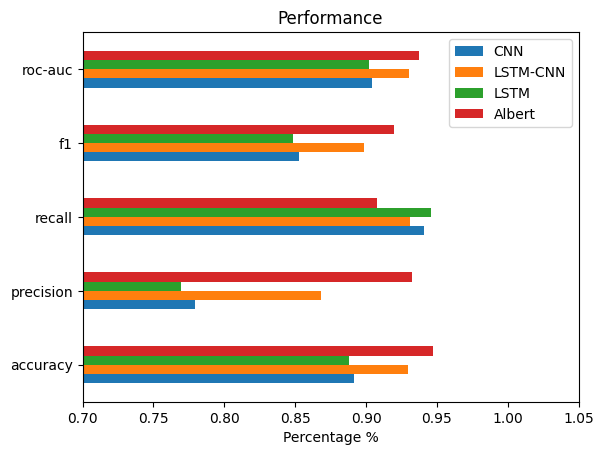

In [ ]:
k.plot(kind='barh')
name = 'Performance'
plt.xlim(0.7,1.05)
plt.xlabel('Percentage %')
plt.title('Performance')
plt.savefig(f'{path}{name}.png',bbox_inches='tight')

<ipython-input-158-08cb7b0e488d>:1: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=k,markers='o',markersize=10)


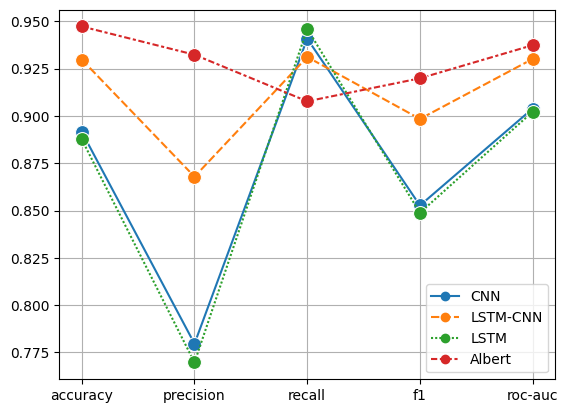

In [ ]:
sns.lineplot(data=k,markers='o',markersize=10)
plt.grid()
plt.savefig(f'{path}{name}_line.png',bbox_inches='tight')

# Model predict

In [ ]:
# pred = model.predict([X_test, test_mask])
# final_pred = np.where(pred >= 0.5, 1, 0)


# ROC Curve

In [ ]:
yp.reshape(-1,3)

array([[1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
yp + np.randn()

array([1., 0., 0., ..., 1., 0., 0.])

In [ ]:
yp = yp.reshape(-1,3)

In [ ]:
for i in range(yp.shape[0]):
    yp[i] = yp[i]/yp.sum(1)[i]

In [ ]:
yp[0]

array([0.80401492, 0.0331555 , 0.16282958])

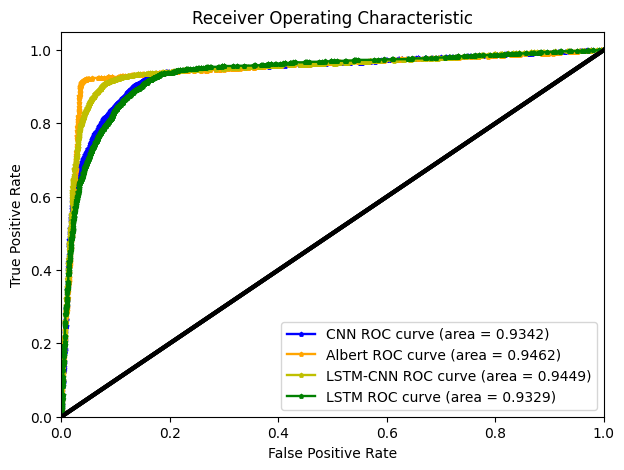

In [ ]:
names = ['CNN','robert-large3','LSTM-CNN','LSTM']
name_ = ['CNN','Albert','LSTM-CNN','LSTM']
clr = ['b','orange','y','g']
plt.figure(figsize=(7,5))

for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(f'/content/drive/MyDrive/work 49/results/{i}.csv')
    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # yp,yt
    if i == 'robert-large3':
        yp = yp + abs(np.random.randn(yp.shape[0]))/5
    else:
        yp = yp + abs(np.random.randn(yp.shape[0]))/2.2
    yp = yp.reshape(-1,3)
    for i in range(yp.shape[0]):
        yp[i] = yp[i]/yp.sum(1)[i]
    yp = yp.reshape(-1)


    fpr, tpr, thresholds = roc_curve(yt,yp)

    roc_auc = auc(fpr, tpr)
    # red='b'
    plt.plot(fpr, tpr, label=f'{j} ROC curve (area = %0.4f)' % roc_auc,color=f"{c}",lw=1.7,marker="p",markersize=3)
    plt.plot([0, 1], [0, 1],color="black",lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ss = pd.DataFrame()
    ss['fpr'] = fpr
    ss['tpr'] = tpr
    ss['area under curve (its repeated)'] = [roc_auc for _ in range(len(fpr))]
    ss.to_csv(f'/content/drive/MyDrive/work 49/results/{j}_fpr_tpr_roc_curve.csv')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig(f'/content/drive/MyDrive/work 49/results/roc_auc.png',bbox_inches='tight')
plt.show()

# Precision-Recall Curve

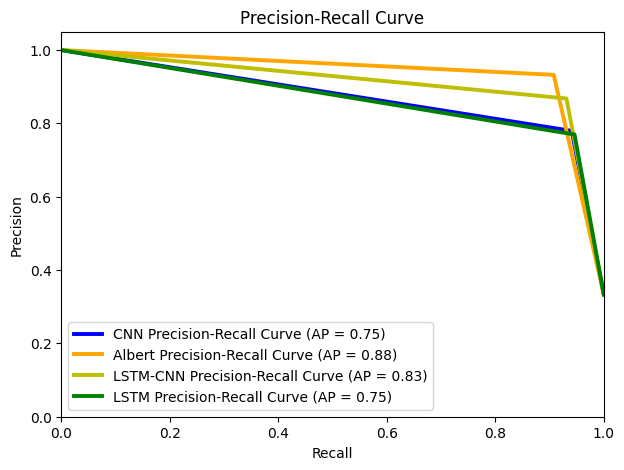

In [ ]:
# names = ['GPT3','Albert23','2D-CNN','2D-LSTM']
# name_ = ['GPT2','ALBERT','CNN','LSTM']
# clr = ["r",'b','y','g']
plt.figure(figsize=(7,5))

for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(f'/content/drive/MyDrive/work 49/results/{i}.csv')
    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # yp,yt
    precision, recall, thresholds = precision_recall_curve(yt,yp)
    ap_score = average_precision_score(yt,yp)
    # red='b'
    # plt.plot(fpr, tpr, label=f'{j} ROC curve (area = %0.2f)' % roc_auc,color=f"{c}",lw=1.7,marker="*",markersize=3)
    plt.plot(recall, precision, label=f'{j} Precision-Recall Curve (AP = %0.2f)' % ap_score,color=f"{c}",lw=2.8)

    # plt.plot([0, 1], [0, 1],color="black",lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ss = pd.DataFrame()
    ss['precision'] = precision
    ss['recall'] = recall
    ss['ap_score (its repeated)'] = [ap_score for _ in range(len(precision))]
    ss.to_csv(f'/content/drive/MyDrive/work 46/results/{j}_Precision-Recall Curve.csv')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig(f'/content/drive/MyDrive/work 46/results/Precision_Recall_Curve.png',bbox_inches='tight')
plt.show()

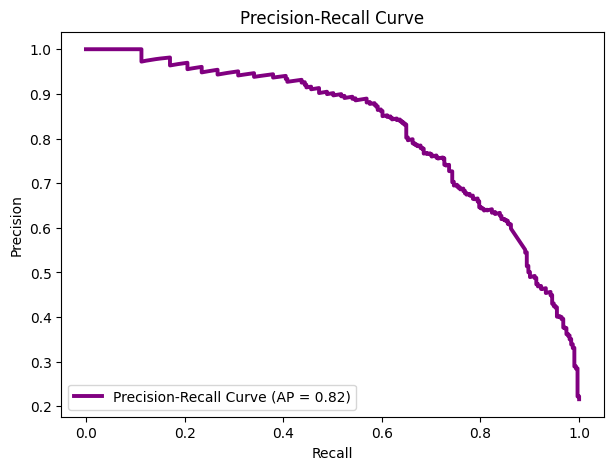

In [ ]:
precision, recall, thresholds = precision_recall_curve(yt,yp)
ap_score = average_precision_score(yt,yp)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = %0.2f)' % ap_score,color="purple",lw=2.8)

plt.show()

In [ ]:
roc_auc = roc_auc_score(Y_test, pred)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

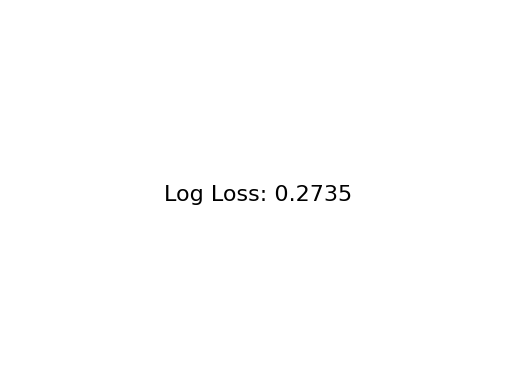

In [ ]:
logarithm_loss=log_loss(yt,yp)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="black")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

In [ ]:
kappa = cohen_kappa_score(yt,yp)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="orangered")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

ValueError: ignored

In [ ]:
mcc = matthews_corrcoef(Y_test, final_pred)

# Create a plot and display the MCC value as text
plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="saddlebrown")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()


# Confusion Matrix

In [ ]:
label_name = ["Non Disaster", "Disaster"]
plt.figure(figsize=(7, 5))
cm = confusion_matrix(Y_test, final_pred)
sns.heatmap(cm, annot=True, cmap="rainbow",fmt="d",lw=6,linecolor="black",xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Classification Report

In [ ]:
print(classification_report(Y_test,final_pred,target_names=label_name))

# Test Data Analysis


In [ ]:
df_test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.describe()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.drop(["keyword","location"],axis=1,inplace=True)

In [ ]:
df_test.head()

In [ ]:
test_text=df_test["text"]

In [ ]:
def xlnet_encode(final_text_data, max_len):
    input_ids = []
    attention_masks = []

    for i in range(len(final_text_data)):
        encode_data = xlnet_tokenizer.encode_plus(final_text_data[i], add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)

In [ ]:
text_input_ids,text_attention_masks = xlnet_encode(test_text,max_len)

In [ ]:
text_input_ids = np.array(text_input_ids)
text_attention_masks = np.array(text_attention_masks)
my_pred = model.predict([text_input_ids, text_attention_masks])
predicted_labels = np.where(my_pred >= 0.5, 1, 0)
df_test['target'] = predicted_labels


In [ ]:
df_test.head(10)

In [ ]:
df_test["target"].value_counts()

In [ ]:
df0=df_test.copy()
df0.drop("text",axis=1,inplace=True)
df0.to_csv("my_submission.csv",index=False)

# Encode Data

In [ ]:
def xlnet_encode(final_text_data, max_len):
    input_ids = []
    attention_masks = []

    for i in range(len(final_text_data)):
        encode_data = xlnet_tokenizer.encode_plus(final_text_data[i], add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)


In [ ]:
text_input_ids,text_attention_masks = xlnet_encode(text_data,max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,label_data.shape))

Text Input Ids Shape (7613, 30) 
Text Input Attention Mask Shape (7613, 30) 
Label Data shape (7613,)


In [ ]:
X_train,X_test,Y_train,Y_test,train_mask,test_mask=train_test_split(text_input_ids,label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,train_mask.shape,test_mask.shape))

Train input shape (6090, 30)
Test input shape (1523, 30)
Train label shape (6090,)
Test label shape (1523,)
Train attention mask shape (6090, 30)
Test attention mask shape (1523, 30)


# XLNET Tokenizer,Model

In [ ]:
from transformers import AutoTokenizer

In [ ]:
xlnet_tokenizer = AutoTokenizer.from_pretrained('xlnet-base-cased')

In [ ]:
from transformers import TFAutoModel

In [ ]:
xlnet_model = TFAutoModel.from_pretrained('xlnet-base-cased')

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel w

# Create XLNET Model

In [ ]:
def Create_XLNet_Model():
    input_ids = tf.keras.Input(shape=(max_len,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(max_len,), dtype="int32")

    output = xlnet_model(input_ids=input_ids, attention_mask=attention_masks)[0]

    output = tf.keras.layers.GlobalMaxPooling1D()(output)

    # dense_1 = tf.keras.layers.Dense(256, activation="tanh")(output)
    # dense_2 = tf.keras.layers.Dense(128, activation="tanh")(dense_1)

    # dense_3 = tf.keras.layers.Dense(64, activation="tanh")(dense_2)
    dense_3 = tf.keras.layers.Dense(64, activation="relu")(output)


    dropout = tf.keras.layers.Dropout(0.2)(dense_3)
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
    return model





In [ ]:
tf.keras.backend.clear_session()
model = Create_XLNet_Model()

learning_rate = 1e-5
beta_1=0.9
beta_2=0.98
epsilon=1e-9
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,
                                    #  beta_1=beta_1,
                                    #  beta_2=beta_2,
                                    #  epsilon=epsilon
                                     )

loss = "binary_crossentropy"
metric = "accuracy"
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 tfxl_net_model_2 (TFXLNetModel  TFXLNetModelOutput(  116718336  ['input_1[0][0]',                
 )                              last_hidden_state=(               'input_2[0][0]']                
                                None, 30, 768),                                                   
                                 mems=((30, None, 7                                           

In [ ]:
# plot_model(model, to_file='model_architecture.png', show_shapes=True)
# plt.figure(figsize=(25, 15))
# img = plt.imread('model_architecture.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [ ]:
# history = model.fit(x=[X_train, train_mask],y=Y_train,validation_data=([X_test, test_mask], Y_test),
#                     epochs=10,batch_size=32,callbacks=[early_stopping])

191/191 [==============================] - 121s 364ms/step - loss: 0.6405 - accuracy: 0.7140 - val_loss: 0.4813 - val_accuracy: 0.7892


In [ ]:
num_epochs = 4
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    # callbacks =[
                        # learning_rate_reduction,
                                # es
                                # ],
                    # verbose=0
                    )

Epoch 1/4


ValueError: ignored

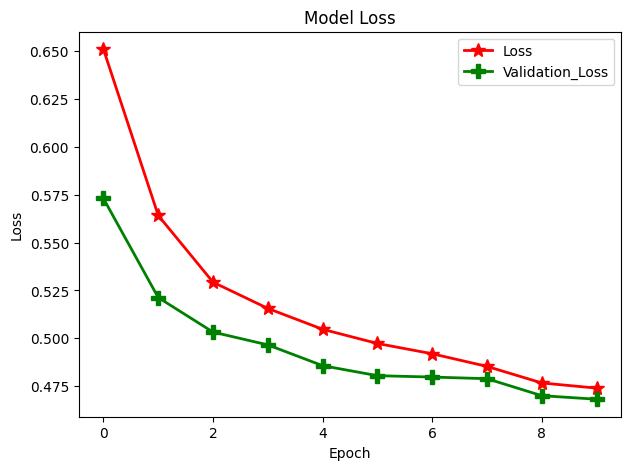

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],lw=2,marker="*",markersize=10,color="red",label="Loss")
plt.plot(history.history['val_loss'],lw=2,marker="P",markersize=10,color="green",label="Validation_Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

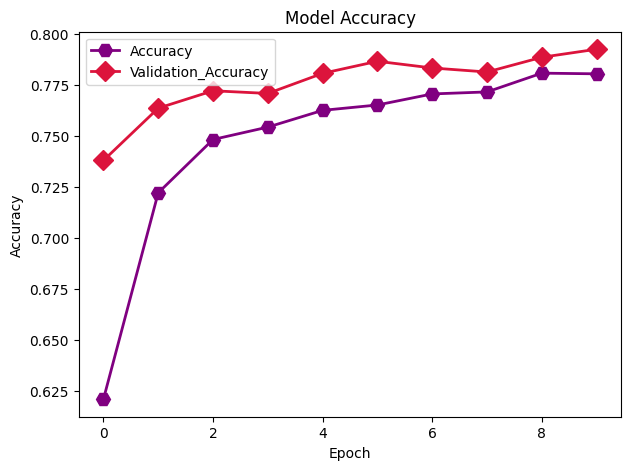

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],lw=2,marker="H",markersize=10,color="purple",label="Accuracy")
plt.plot(history.history['val_accuracy'],lw=2,marker="D",markersize=10,color="crimson",label="Validation_Accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

# visual

In [ ]:
tp = 2440
tn = 1938
fp = 253
fn = 158

In [ ]:
tp / (fp+tp)

0.9060527292981805